In [27]:
# Model design
import agentpy as ap
import random

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython


In [28]:
# If agentpy is not installed, uncomment this
# ! pip install agentpy

In [29]:

'''
Rules of the system:
1. A burning tree becomes an empty site
2. A green tree becomes burning if at least one of its neighbours is burning
3. At an empty site, a tree grows with the probability p
4. A tree without a burning neighbour becomes a burning tree at any time step with the probability f ('lightning')

Modifications needed:
1. Do not automatically start the burning
2. Add a condition where a tree starts growing
3. Adjust probabilities
4. Do not stop the animation
Hello :)
'''

"\nRules of the system:\n1. A burning tree becomes an empty site\n2. A green tree becomes burning if at least one of its neighbours is burning\n3. At an empty site, a tree grows with the probability p\n4. A tree without a burning neighbour becomes a burning tree at any time step with the probability f ('lightning')\n\nModifications needed:\n1. Do not automatically start the burning\n2. Add a condition where a tree starts growing\n3. Adjust probabilities\n4. Do not stop the animation\nHello :)\n"

In [30]:
class ForestModel(ap.Model):

    def setup(self):

        # Create agents (trees)
        n_trees = int(self.p['Tree density'] * (self.p.size**2))
        trees = self.agents = ap.AgentList(self, n_trees)

        # Create grid (forest)
        self.forest = ap.Grid(self, [self.p.size]*2, track_empty=True)
        self.forest.add_agents(trees, random=True, empty=True)

        # Initiate a dynamic variable for all trees
        # Condition 0: Alive, 1: Burning, 2: Empty
        self.agents.condition = 0

        # Amount of lightning
        self.f = self.p['probability of lightning']

        # Ratio between f and p
        self.p_over_f = self.p['p_over_f']

        # Assign value to p
        self.growth = self.f * self.p_over_f

        # Start a fire from the left side of the grid
        # unfortunate_trees = self.forest.agents[0:self.p.size, 0:2]
        # unfortunate_trees.condition = 1
        #added:
        self.tree_counts = []  # Initialize list to store number of trees

    def step(self):

        # Select burning trees
        burning_trees = self.agents.select(self.agents.condition == 1)

        # Select empty lots
        no_trees = self.agents.select(self.agents.condition == 2)

        # Select healthy trees
        healthy_trees = self.agents.select(self.agents.condition == 0)

        # Add lighting
        for tree in healthy_trees:
            if random.random() < self.f:
                tree.condition = 1

        # Spread fire
        for tree in burning_trees:
            for neighbor in self.forest.neighbors(tree):
                if neighbor.condition == 0:
                    neighbor.condition = 1 # Neighbor starts burning
            tree.condition = 2 # Tree burns out
        nr_trees = len(self.agents.select(self.agents.condition == 0))
        self.tree_counts.append(nr_trees)  # Save number of trees at each step
        
        for tree in no_trees:
            if random.random() < self.growth:
                tree.condition = 0

        # Stop simulation if no fire is left
       # if len(burning_trees) == 0:
        #    self.stop()

    def end(self):

        # Document a measure at the end of the simulation
        burned_trees = len(self.agents.select(self.agents.condition == 2))
        self.report('Percentage of burned trees',
                    burned_trees / len(self.agents))

In [31]:
# Define parameters

parameters = {
    'Tree density': 0.5, # Percentage of grid covered by trees
    'size': 256, # Height and length of the grid
    'steps': 200,
    'probability of lightning': 0.0001,
    'p_over_f': 10000 # assign a ratio to ensure that f << p
}

In [ ]:
# Create single-run animation with custom colors

def animation_plot(model, ax):
    attr_grid = model.forest.attr_grid('condition')
    color_dict = {0:'#7FC97F', 1:'#d62c2c', 2:'#e5e5e5', None:'#d5e5d5'}
    ap.gridplot(attr_grid, ax=ax, color_dict=color_dict, convert=True)
    ax.set_title(f"Simulation of a forest fire\n"
                 f"Time-step: {model.t}, Trees left: "
                 f"{len(model.agents.select(model.agents.condition == 0))}")

def animation_plot_values(model):
    time_steps = []
    attr_grid = model.forest.attr_grid('condition')
    model.tree_counts.append(len(model.agents.select(model.agents.condition == 0)))
    return time_steps, model.tree_counts


fig, ax = plt.subplots()
model = ForestModel(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml(fps=15))


AttributeError: 'FuncAnimation' object has no attribute 'embed_limit'

[32763, 32747, 32710, 32643, 32548, 32448, 32353, 32251, 32116, 31957, 31777, 31570, 31397, 31230, 31053, 30848, 30611, 30415, 30257, 30127, 30030, 29872, 29667, 29453, 29294, 29220, 29187, 29194, 29222, 29182, 29059, 28943, 28888, 28883, 28863, 28798, 28762, 28748, 28753, 28813, 28882, 28988, 29044, 29004, 28972, 29011, 29143, 29282, 29311, 29331, 29295, 29319, 29367, 29409, 29363, 29229, 29127, 29103, 29059, 28991, 28926, 28941, 29000, 29031, 29020, 28935, 28881, 28801, 28770, 28679, 28702, 28750, 28897, 29009, 29106, 29128, 29173, 29184, 29192, 29202, 29186, 29163, 29106, 29124, 29150, 29146, 29123, 29053, 28944, 28793, 28705, 28606, 28557, 28560, 28636, 28696, 28710, 28758, 28777, 28799, 28855, 28980, 29133, 29252, 29375, 29478, 29564, 29644, 29663, 29691, 29716, 29784, 29814, 29847, 29851, 29862, 29836, 29800, 29721, 29679, 29653, 29653, 29547, 29401, 29250, 29234, 29259, 29277, 29152, 28967, 28780, 28671, 28702, 28710, 28681, 28528, 28512, 28572, 28695, 28797, 28896, 29021, 29072

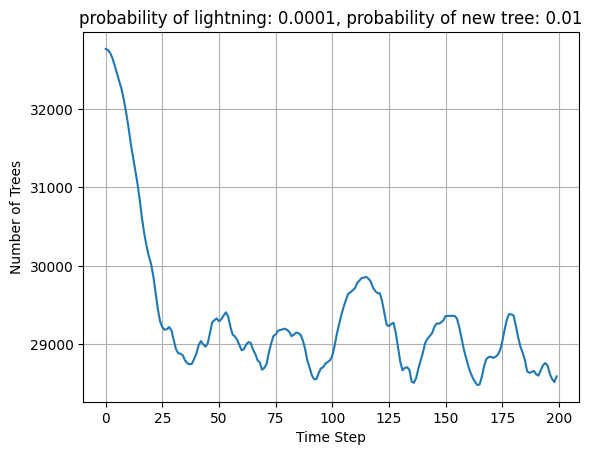

[32767, 32757, 32734, 32686, 32626, 32541, 32446, 32307, 32140, 31956, 31755, 31553, 31338, 31133, 30940, 30705, 30454, 30140, 29864, 29612, 29427, 29284, 29134, 28969, 28821, 28685, 28660, 28661, 28775, 28830, 28918, 28932, 28926, 28861, 28906, 29043, 29235, 29396, 29501, 29546, 29556, 29537, 29511, 29477, 29441, 29428, 29325, 29257, 29146, 29060, 28959, 28859, 28744, 28606, 28499, 28428, 28453, 28386, 28365, 28312, 28370, 28441, 28521, 28662, 28793, 28841, 28828, 28777, 28792, 28797, 28836, 28830, 28843, 28859, 28933, 29003, 29029, 29011, 29028, 29174, 29298, 29358, 29344, 29332, 29331, 29272, 29204, 29155, 29115, 29096, 29059, 29064, 29058, 28990, 28861, 28755, 28708, 28748, 28775, 28827, 28838, 28843, 28803, 28726, 28631, 28602, 28584, 28588, 28486, 28396, 28308, 28282, 28297, 28345, 28411, 28438, 28588, 28749, 28905, 28933, 28942, 28969, 28980, 29048, 29080, 29083, 28994, 28912, 28758, 28618, 28504, 28510, 28581, 28638, 28718, 28740, 28754, 28777, 28862, 28974, 29010, 29044, 29018

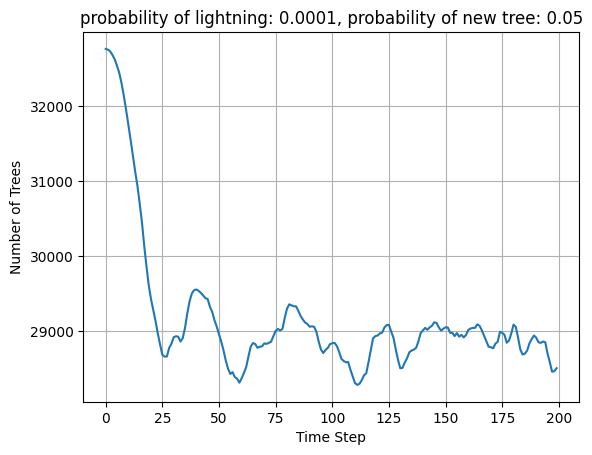

[32763, 32737, 32684, 32591, 32491, 32372, 32230, 32053, 31847, 31629, 31384, 31170, 30981, 30820, 30619, 30381, 30145, 29863, 29618, 29343, 29133, 28878, 28731, 28570, 28487, 28456, 28531, 28621, 28695, 28773, 28943, 29054, 29191, 29228, 29363, 29427, 29529, 29609, 29693, 29804, 29823, 29865, 29834, 29787, 29759, 29727, 29663, 29523, 29371, 29228, 29124, 29078, 29049, 29035, 28994, 29046, 29068, 29112, 29120, 29133, 29152, 29134, 29164, 29191, 29219, 29280, 29289, 29295, 29234, 29191, 29201, 29161, 29177, 29203, 29271, 29311, 29351, 29350, 29340, 29284, 29324, 29375, 29339, 29300, 29267, 29309, 29339, 29376, 29439, 29405, 29347, 29316, 29355, 29420, 29433, 29459, 29473, 29517, 29584, 29607, 29583, 29497, 29366, 29306, 29273, 29318, 29230, 29138, 29070, 29035, 29041, 28967, 29001, 29044, 29148, 29239, 29260, 29216, 29134, 29094, 29026, 28979, 28896, 28944, 28985, 29033, 29003, 28979, 28976, 28997, 28988, 28934, 28906, 28897, 28906, 28960, 28966, 28982, 28884, 28814, 28784, 28774, 28801

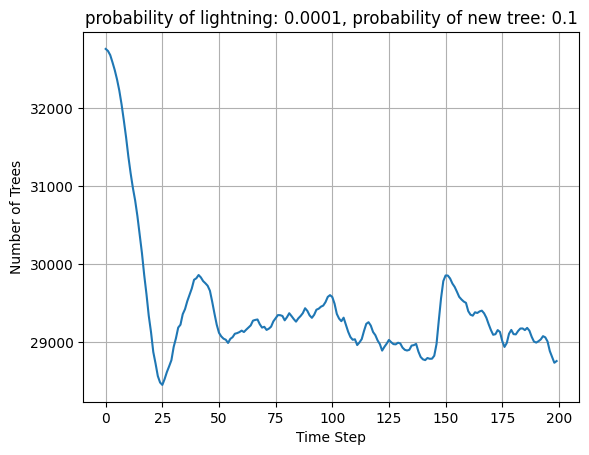

[32763, 32743, 32692, 32619, 32526, 32416, 32277, 32133, 31981, 31847, 31647, 31443, 31219, 31072, 30993, 30901, 30795, 30591, 30395, 30213, 30075, 29913, 29702, 29551, 29513, 29485, 29356, 29157, 29028, 28959, 28850, 28742, 28668, 28719, 28727, 28706, 28690, 28759, 28949, 29148, 29341, 29524, 29626, 29640, 29578, 29479, 29469, 29393, 29355, 29242, 29170, 29089, 29049, 29040, 29037, 29052, 29036, 28984, 28963, 28893, 28930, 28957, 29050, 29173, 29232, 29336, 29360, 29412, 29482, 29594, 29775, 29926, 30101, 30163, 30131, 30008, 29859, 29756, 29629, 29493, 29304, 29094, 28968, 28864, 28833, 28735, 28664, 28622, 28727, 28847, 28890, 28842, 28901, 29036, 29130, 29123, 29098, 29181, 29263, 29323, 29318, 29339, 29342, 29357, 29314, 29295, 29241, 29146, 29032, 28941, 28854, 28739, 28587, 28403, 28336, 28355, 28482, 28530, 28513, 28485, 28432, 28381, 28329, 28251, 28145, 28046, 28122, 28315, 28461, 28568, 28616, 28697, 28737, 28871, 29019, 29166, 29166, 29154, 29103, 29145, 29188, 29321, 29445

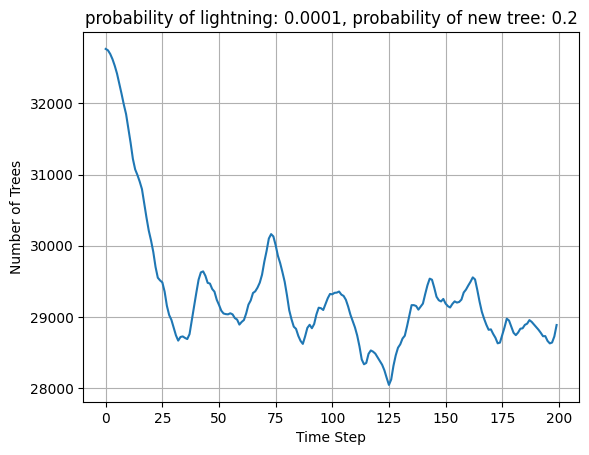

[32738, 32599, 32276, 31763, 31159, 30470, 29689, 28753, 27784, 26831, 25998, 25378, 24940, 24823, 24853, 25035, 25286, 25561, 25823, 25903, 25851, 25812, 25700, 25676, 25591, 25577, 25460, 25326, 25103, 24917, 24819, 24883, 25017, 25256, 25452, 25620, 25512, 25339, 25013, 24719, 24543, 24610, 24812, 25022, 25129, 25241, 25326, 25457, 25333, 25123, 24829, 24700, 24548, 24417, 24331, 24355, 24498, 24636, 24778, 24796, 24883, 24911, 24930, 24951, 24917, 24967, 24913, 24891, 24799, 24686, 24603, 24614, 24744, 24841, 24825, 24799, 24805, 24775, 24635, 24542, 24534, 24591, 24630, 24771, 24980, 25194, 25106, 24967, 24765, 24692, 24630, 24563, 24560, 24538, 24625, 24747, 24914, 24989, 25019, 24938, 24774, 24609, 24434, 24312, 24182, 24134, 24199, 24251, 24277, 24297, 24345, 24410, 24500, 24577, 24590, 24621, 24634, 24719, 24618, 24515, 24410, 24313, 24333, 24349, 24511, 24639, 24786, 24889, 24975, 24981, 24864, 24716, 24629, 24670, 24814, 24997, 25084, 25023, 24937, 24891, 24731, 24608, 24551

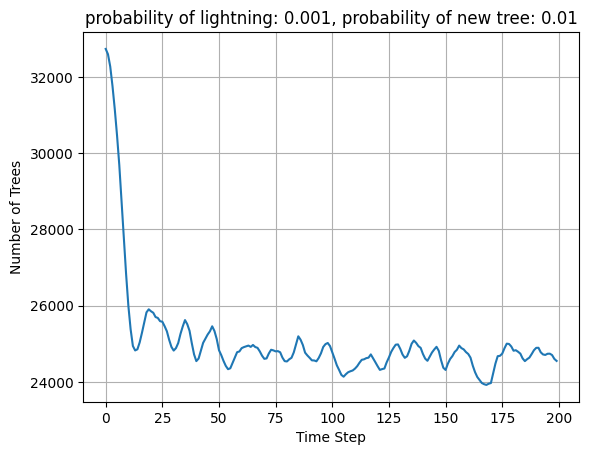

[32724, 32516, 32090, 31425, 30576, 29670, 28703, 27823, 26958, 26321, 25666, 25240, 24921, 24926, 25033, 25273, 25444, 25580, 25638, 25722, 25717, 25747, 25715, 25610, 25388, 25198, 24986, 24702, 24435, 24366, 24514, 24714, 24902, 25031, 25240, 25404, 25453, 25470, 25460, 25481, 25422, 25167, 24874, 24512, 24481, 24587, 24815, 24913, 24939, 24894, 24932, 24921, 25042, 25111, 25200, 25137, 25102, 25111, 25042, 25024, 24951, 24985, 24977, 25029, 25152, 25203, 25163, 25095, 25011, 24921, 24800, 24696, 24716, 24745, 24797, 24869, 24901, 25064, 25269, 25455, 25579, 25643, 25825, 25812, 25676, 25406, 25162, 24988, 24787, 24795, 24752, 24770, 24650, 24642, 24746, 24877, 24952, 24920, 24947, 24993, 25026, 25027, 24972, 24920, 24884, 25004, 25174, 25232, 25172, 25037, 24941, 24886, 24831, 24920, 24901, 24900, 24821, 24929, 25005, 25026, 24876, 24781, 24687, 24740, 24837, 25001, 25051, 25012, 24877, 24835, 24896, 25017, 25012, 25025, 25055, 25135, 25121, 25147, 25059, 24990, 24813, 24730, 24579

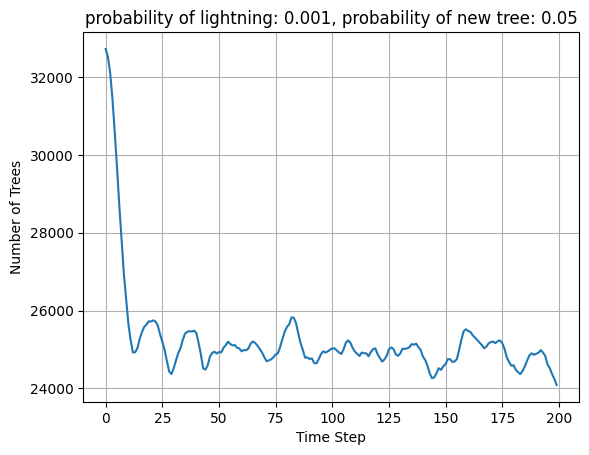

[32732, 32553, 32163, 31568, 30777, 29858, 28916, 28069, 27289, 26507, 25750, 25198, 24751, 24559, 24590, 24976, 25533, 26011, 26374, 26590, 26724, 26649, 26374, 26020, 25718, 25446, 25284, 25248, 25356, 25423, 25486, 25618, 25842, 26010, 25949, 25790, 25556, 25362, 25108, 24819, 24646, 24713, 24824, 24989, 24942, 24910, 24835, 24870, 24980, 25072, 25258, 25324, 25301, 25044, 24828, 24739, 24665, 24543, 24377, 24323, 24399, 24539, 24690, 24777, 24809, 24682, 24640, 24667, 24773, 24855, 24830, 24866, 24855, 24852, 24835, 24839, 24843, 24938, 25005, 25037, 24925, 24817, 24707, 24518, 24386, 24367, 24498, 24657, 24811, 24910, 24960, 24996, 24945, 24903, 24845, 24776, 24715, 24601, 24689, 24805, 24851, 24919, 24907, 25013, 25004, 24932, 24785, 24620, 24539, 24510, 24527, 24600, 24665, 24713, 24782, 24764, 24728, 24630, 24628, 24581, 24526, 24496, 24500, 24630, 24698, 24739, 24767, 24846, 24998, 24965, 24987, 24979, 25012, 24992, 24894, 24842, 24844, 25031, 25260, 25409, 25411, 25315, 25199

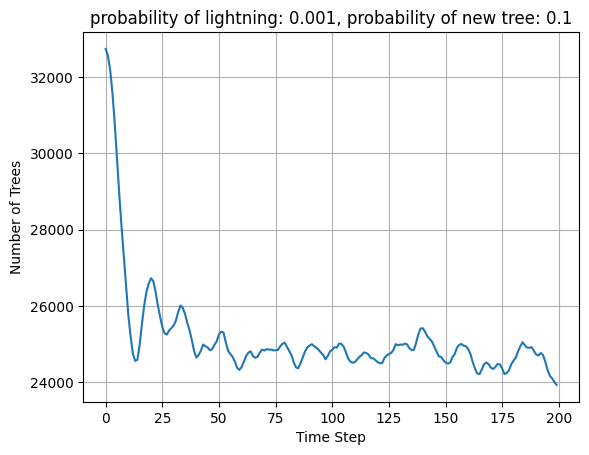

[32747, 32634, 32369, 31925, 31326, 30607, 29753, 28788, 27799, 26801, 25904, 25191, 24719, 24540, 24449, 24541, 24756, 25041, 25325, 25424, 25538, 25664, 25772, 25692, 25446, 25213, 25045, 24821, 24614, 24494, 24524, 24568, 24590, 24662, 24876, 25097, 25223, 25188, 25201, 25241, 25298, 25303, 25154, 25052, 24913, 25029, 25038, 25082, 25014, 25017, 25020, 25044, 25024, 24914, 24761, 24699, 24729, 24837, 24867, 24854, 24814, 24861, 25001, 25086, 25212, 25266, 25262, 25205, 25091, 24998, 24731, 24524, 24376, 24368, 24344, 24326, 24369, 24579, 24936, 25230, 25381, 25385, 25340, 25173, 25008, 24891, 24883, 24912, 24968, 24943, 24856, 24857, 24996, 25152, 25086, 25008, 25015, 25121, 25214, 25342, 25443, 25564, 25557, 25559, 25446, 25341, 25153, 25015, 24805, 24720, 24693, 24824, 24951, 25036, 25128, 25215, 25271, 25237, 25157, 25134, 25026, 24888, 24790, 24764, 24758, 24671, 24693, 24722, 24811, 24838, 24891, 24958, 24941, 25042, 25109, 25173, 25034, 24886, 24881, 24991, 25139, 25184, 25132

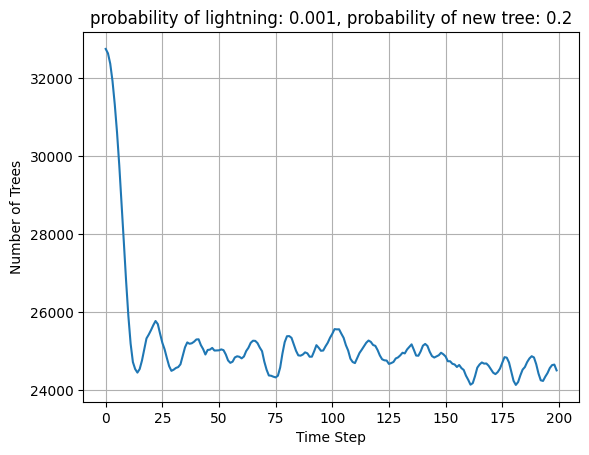

[32432, 30874, 27792, 23624, 19815, 17400, 16893, 18000, 19556, 20589, 20632, 19864, 18812, 18088, 18219, 18998, 19696, 19921, 19482, 18812, 18198, 18111, 18520, 19128, 19399, 19240, 18799, 18470, 18359, 18453, 18690, 19019, 19207, 19049, 18693, 18355, 18349, 18440, 18600, 18547, 18431, 18353, 18326, 18483, 18662, 18966, 19093, 18885, 18490, 18057, 18002, 18100, 18161, 18209, 18219, 18342, 18190, 18224, 18295, 18617, 18616, 18477, 18264, 18126, 18168, 18355, 18661, 18797, 18736, 18485, 18189, 17998, 18021, 18144, 18164, 18154, 18075, 18030, 18023, 18037, 18124, 18087, 18111, 18151, 18193, 18265, 18328, 18496, 18719, 18826, 18753, 18474, 18321, 18300, 18355, 18347, 18193, 18075, 17931, 17795, 17788, 17870, 17964, 17867, 17814, 17918, 18120, 18242, 18321, 18313, 18269, 18153, 18018, 17974, 18050, 18212, 18246, 18150, 18067, 18083, 18159, 18299, 18330, 18342, 18273, 18255, 18194, 18044, 17988, 18036, 18156, 18103, 18066, 18071, 18147, 18162, 18198, 18090, 18058, 17921, 17874, 17788, 17818

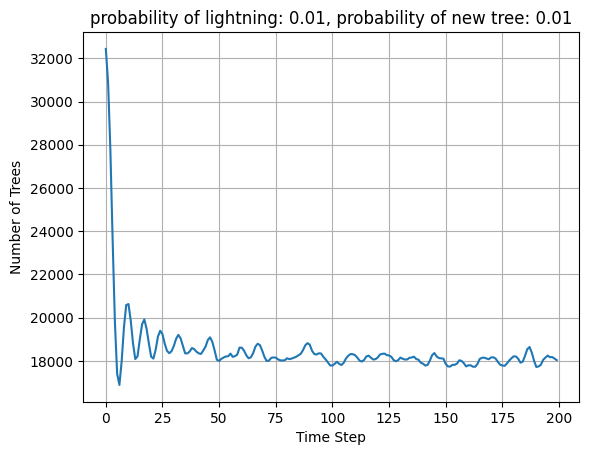

[32444, 30863, 27726, 23671, 20027, 17600, 17023, 17997, 19774, 20813, 20681, 19597, 18441, 17804, 17949, 18620, 19339, 19557, 19226, 18543, 18011, 17847, 18195, 18853, 19296, 19388, 19050, 18513, 18267, 18302, 18513, 18490, 18298, 18246, 18245, 18326, 18489, 18552, 18615, 18481, 18238, 18023, 17956, 18052, 18244, 18339, 18449, 18367, 18154, 18015, 17909, 17979, 18139, 18287, 18381, 18266, 18339, 18511, 18580, 18456, 18166, 18097, 18157, 18289, 18371, 18388, 18357, 18320, 18198, 18058, 17868, 17735, 17745, 17926, 18196, 18275, 18132, 17979, 17840, 17910, 18008, 18174, 18145, 17938, 17780, 17745, 17808, 17964, 17990, 18016, 18214, 18402, 18473, 18268, 18116, 18004, 17937, 17935, 18052, 18154, 18265, 18254, 18113, 17828, 17796, 17878, 18097, 18213, 18408, 18386, 18122, 17819, 17813, 17905, 18024, 18138, 18331, 18387, 18435, 18347, 18373, 18309, 18307, 18200, 18108, 18080, 18158, 18255, 18335, 18399, 18402, 18312, 18267, 18175, 18147, 17969, 18021, 18042, 18208, 18250, 18231, 18267, 18156

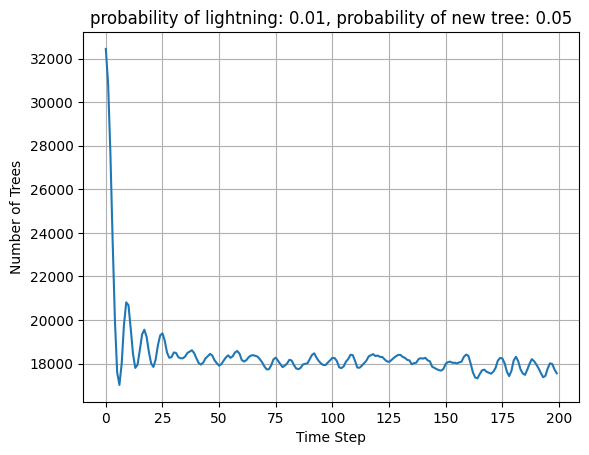

[32445, 30847, 27623, 23359, 19575, 17452, 17293, 18549, 20120, 20966, 20639, 19595, 18353, 17891, 18047, 18787, 19514, 19841, 19622, 19034, 18502, 18335, 18515, 18929, 19257, 19258, 18807, 18306, 18125, 18364, 18682, 18746, 18636, 18407, 18257, 18092, 18178, 18227, 18284, 18029, 17760, 17618, 17652, 17890, 18135, 18218, 18061, 17823, 17779, 17838, 18006, 18149, 18267, 18147, 18058, 18149, 18490, 18680, 18456, 18222, 18145, 18312, 18510, 18558, 18568, 18363, 18195, 18115, 18108, 18182, 18123, 18146, 18162, 18302, 18380, 18564, 18622, 18544, 18215, 18058, 18076, 18238, 18220, 18204, 18214, 18354, 18526, 18569, 18411, 17995, 17743, 17650, 17706, 17781, 17994, 18184, 18305, 18309, 18271, 18217, 18122, 18205, 18271, 18160, 17983, 17825, 17899, 18029, 18203, 18425, 18378, 18070, 17759, 17827, 18246, 18624, 18638, 18412, 18208, 18139, 18110, 18050, 18054, 18024, 17981, 17904, 17953, 17922, 17838, 17712, 17733, 17797, 18002, 18104, 18234, 18209, 18109, 18072, 18131, 18240, 18254, 18212, 18213

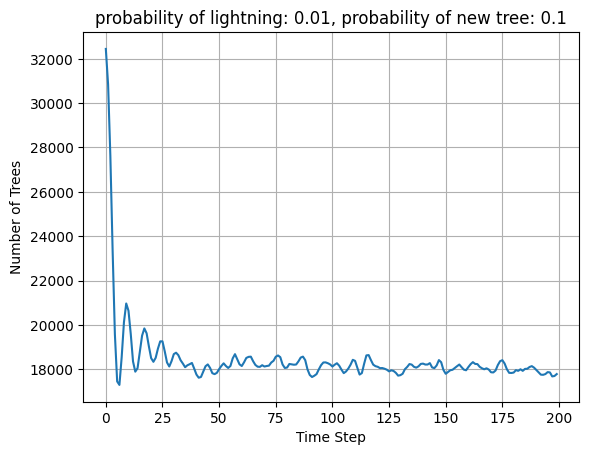

[32431, 30843, 27644, 23300, 19395, 16995, 16765, 18197, 20051, 21064, 20791, 19764, 18563, 17920, 17957, 18726, 19514, 19963, 19722, 19180, 18650, 18481, 18583, 18748, 18708, 18456, 18095, 18008, 18033, 18301, 18456, 18576, 18527, 18279, 18107, 18001, 18104, 18151, 18123, 18143, 18212, 18307, 18319, 18258, 18228, 18248, 18296, 18369, 18283, 18147, 18059, 18131, 18340, 18374, 18238, 18092, 18025, 18172, 18173, 18133, 18046, 17942, 17892, 17758, 17796, 17829, 17825, 17789, 17837, 17879, 17925, 17970, 18101, 18034, 17837, 17775, 17755, 17837, 17839, 18029, 18260, 18289, 18115, 17779, 17603, 17615, 17679, 17882, 17978, 18128, 17990, 17886, 17802, 17768, 17839, 17870, 17955, 17819, 17767, 17679, 17636, 17651, 17685, 17750, 17663, 17458, 17395, 17437, 17641, 17671, 17421, 17201, 17188, 17414, 17631, 17877, 18138, 18311, 18372, 18383, 18242, 17954, 17661, 17600, 17621, 17667, 17720, 17746, 17720, 17708, 17696, 17673, 17557, 17429, 17419, 17576, 17733, 17722, 17659, 17548, 17569, 17477, 17468

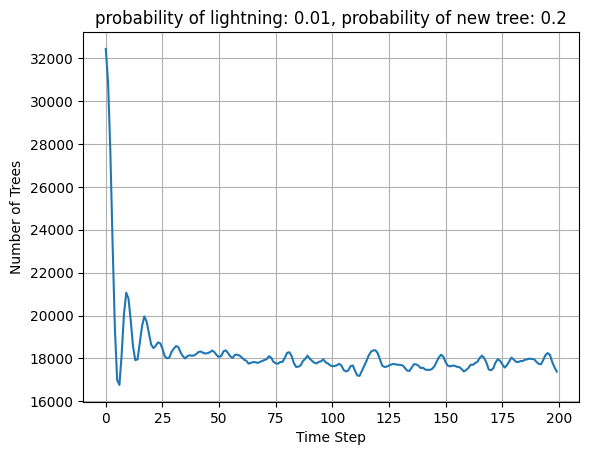

KeyboardInterrupt: 

In [ ]:
# list_lightning = [0.0001, 0.001, 0.01, 0.1]
# list_new_tree = [0.01, 0.05, 0.1, 0.2]
# for f in list_lightning:
#     for p in list_new_tree:
#         parameters['probability of lightning'] = f
#         parameters['probability of new tree'] = p
#         model = ForestModel(parameters)
#         model.setup()  # initialize model

#         # run your simulation manually:
#         for step in range(parameters['steps']):
#             model.step()
#             trees = model.tree_counts
#             time = list(range(len(trees)))
    
#         print(trees)
#         print(time)
#         plt.plot(time, trees)
#         plt.xlabel("Time Step")
#         plt.ylabel("Number of Trees")
#         plt.title(f"probability of lightning: {f}, probability of new tree: {p}")
#         plt.grid(True)
#         plt.show()
